In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
df = pd.read_csv('../data/netflix_titles.csv')

## Intermediate

In [44]:
# Most common genres (split and count) 
df.head()
df_genre = df.copy()
genre = df_genre['listed_in'].str.split(', ')
all_genres = genre.explode()
genre_counts_total = all_genres.value_counts()
genre_counts_total

listed_in
International Movies            2752
Dramas                          2427
Comedies                        1674
International TV Shows          1351
Documentaries                    869
Action & Adventure               859
TV Dramas                        763
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
TV Comedies                      581
Thrillers                        577
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 253
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows             

In [40]:
# Top 10 directors with the most movies
topdirectors = df[df['type'] == "Movie"]['director'].value_counts().head(10)
topdirectors.head

<bound method NDFrame.head of director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              15
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Jay Chapman               12
Youssef Chahine           12
Steven Spielberg          11
Name: count, dtype: int64>

In [2]:
# Count how many movies per country (handle missing countries)
df['country'] = df['country'].fillna('Unknown')

movies_per_country = df[df['type'] == "Movie"]['country'].value_counts()
movies_per_country

country
United States                                             2058
India                                                      893
Unknown                                                    440
United Kingdom                                             206
Canada                                                     122
                                                          ... 
Germany, Canada, United States                               1
Denmark, United Kingdom, South Africa, Sweden, Belgium       1
Serbia, South Korea, Slovenia                                1
United Kingdom, Spain, Belgium                               1
United States, Canada, Japan, Panama                         1
Name: count, Length: 652, dtype: int64

C:\Users\parag\AppData\Local\Temp\ipykernel_9076\1273533771.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = 'listed_in', x = 'genre', data=top_genre, palette='rainbow')


Text(0.5, 1.0, 'Top 10 genre')

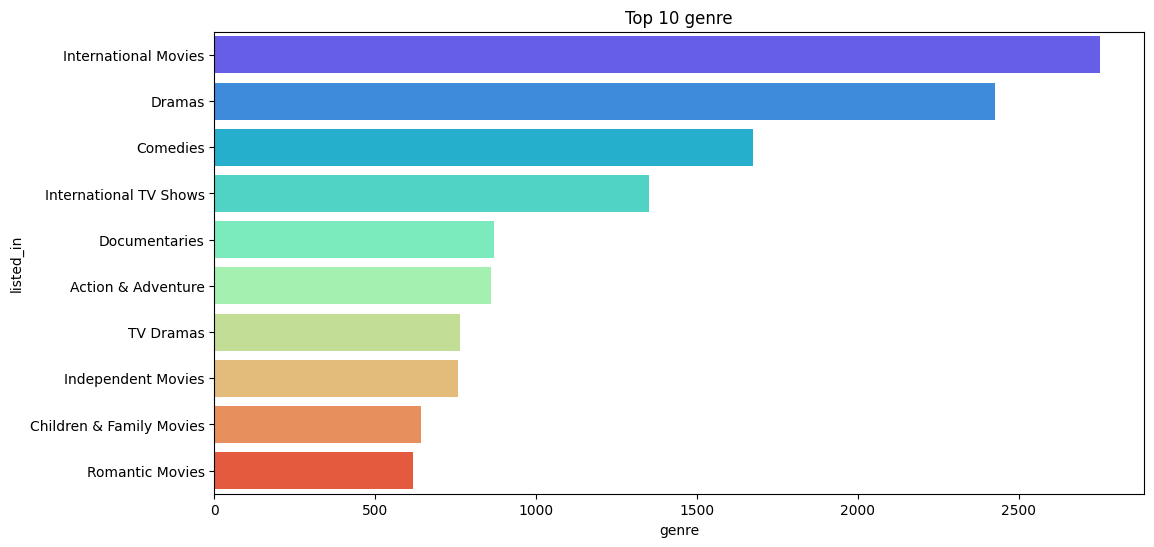

In [ ]:
# Top 10 genre
df_genre = df.copy()
genre = df_genre['listed_in'].str.split(', ')
all_genres = genre.explode()
genre_counts_total = all_genres.value_counts()
top_genre = genre_counts_total.head(10).reset_index(name = 'genre')
top_genre
plt.figure(figsize=(12,6))
sns.barplot(y = 'listed_in', x = 'genre', data=top_genre, palette='rainbow')
plt.title("Top 10 genre")

C:\Users\parag\AppData\Local\Temp\ipykernel_9076\86886071.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'count', y = 'director', data = top_directors, palette='magma')


<Axes: xlabel='count', ylabel='director'>

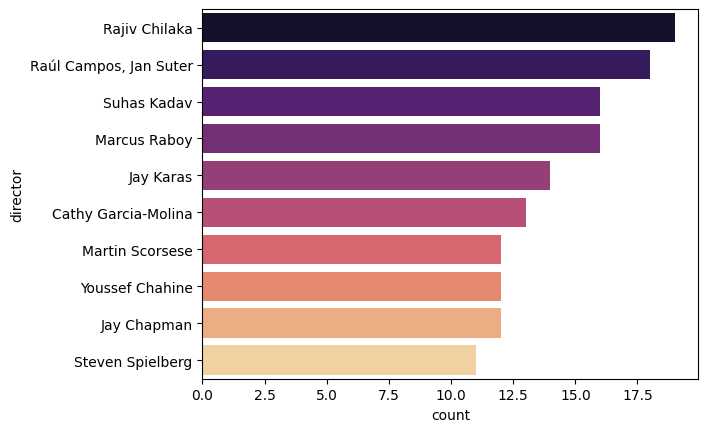

In [17]:
# Top 10 directors
df.head()
top_directors = df['director'].value_counts().head(10).reset_index(name = 'count')
top_directors
sns.barplot(x = 'count', y = 'director', data = top_directors, palette='magma')

C:\Users\parag\AppData\Local\Temp\ipykernel_10392\1347941858.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_dur['new_duration'] = df_clean_dur["duration"].str.split(" min").str[0]
C:\Users\parag\AppData\Local\Temp\ipykernel_10392\1347941858.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_dur['new_duration_numeric'] = pd.to_numeric(df_clean_dur['new_duration'])


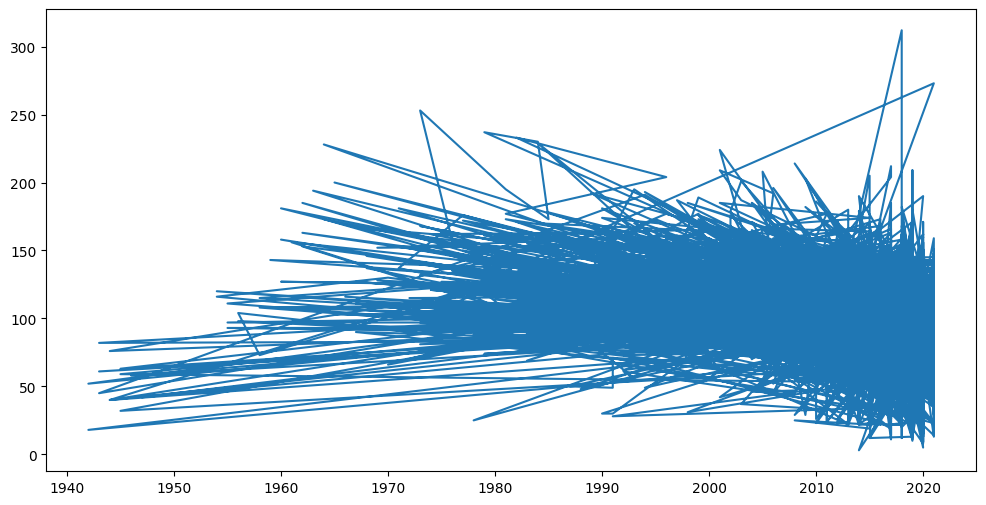

In [3]:
# Average movie duration over the years
df_clean = df.copy()
df_clean_dur = df_clean[(df_clean['type'] == "Movie")]
df_clean_dur['new_duration'] = df_clean_dur["duration"].str.split(" min").str[0]
df_clean_dur['new_duration_numeric'] = pd.to_numeric(df_clean_dur['new_duration'])
df_clean_dur.dtypes
df_clean['duration_min'] = df_clean_dur['new_duration_numeric']
duration_per_release_year = df_clean.dropna(subset=['duration_min'])
data_for_durVSry = duration_per_release_year[['release_year', 'duration_min']]   
plt.figure(figsize=(12,6))
plt.plot(data_for_durVSry['release_year'], data_for_durVSry['duration_min'])

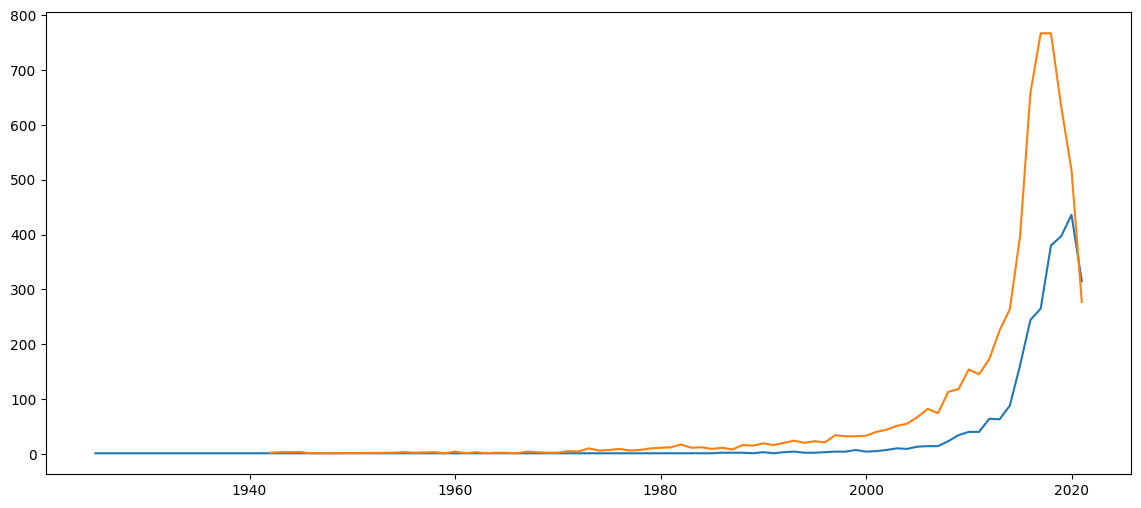

In [31]:
# Number of TV shows vs movies released per year
tv_shows = df[df['type'] == "TV Show"].groupby('release_year').size().reset_index(name= 'tv show')
movie = df[df['type'] == "Movie"].groupby('release_year').size().reset_index(name= 'movie')
plt.figure(figsize=(14,6))
plt.plot(tv_shows['release_year'], tv_shows['tv show'], label='TV Shows')
plt.plot(movie['release_year'], movie['movie'], label='Movies')

<Axes: xlabel='count', ylabel='country'>

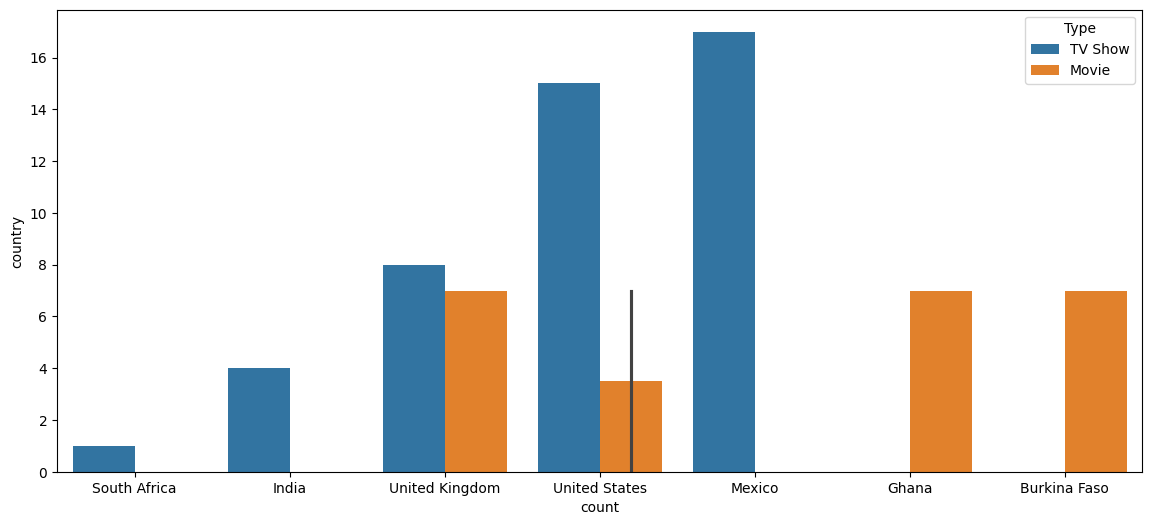

In [55]:
# Country vs Type : plot showing top 5 countries and their distribution of Movies vs TV Shows
tv_shows = df[df['type'] == "TV Show"]
tv_shows_countrywise = tv_shows['country'].str.split(', ').explode().dropna().head(5).reset_index()
tv_shows_countrywise.columns = ['country', 'count']
tv_shows_countrywise['Type'] = 'TV Show'

movies = df[df['type'] == "Movie"]
movies_countrywise = movies['country'].str.split(', ').explode().dropna().head(5).reset_index()
movies_countrywise.columns = ['country', 'count']
movies_countrywise['Type'] = 'Movie'

combined = pd.concat([tv_shows_countrywise, movies_countrywise])

plt.figure(figsize=(14,6))
sns.barplot(x='count', y='country', hue='Type', data=combined)
